In [1]:
import numpy as np
from matplotlib import pyplot as plt
from SIR import SIR
from ODESolver import ForwardEuler

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsmath}',
    'font.size': 14,
    'axes.grid': False,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}

plt.rcParams.update(myparams)

%load_ext autoreload
%autoreload 2

In [2]:
def SIREpidemicPlot(sir, time_steps):
    solver = ForwardEuler(sir)
    solver.set_initial_conditions(sir.initial_conditions)

    t, u = solver.solve(time_steps)

    plt.fill_between(t, np.zeros_like(t), u[:, 1], color="#f46753", label="Infected")
    plt.fill_between(t, u[:, 1], u[:, 1] + u[:, 0], color="#30616c", label="Susceptible")
    plt.fill_between(t, u[:, 1] + u[:, 0], u[:, 1] + u[:, 0] + u[:, 2], color="#434343", label="Recovered")
    plt.xlabel("Day")
    plt.ylabel("Number of people")
    plt.xlim(0, t[-1])
    plt.ylim(0, sir.N)
    plt.legend()
    plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 86371.86it/s]


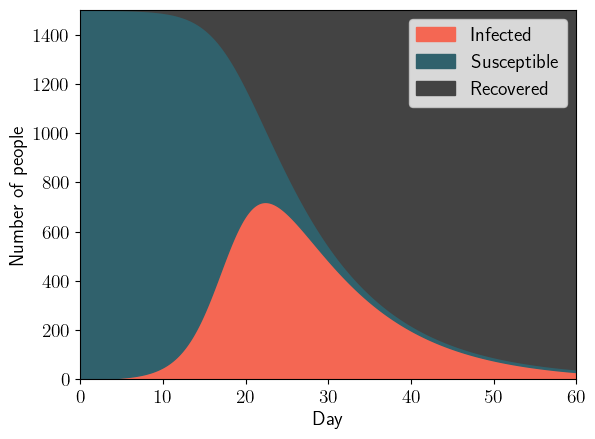

In [3]:
#beta = lambda t: 0.7 if t <=10 else 0.2
beta = 0.5
gamma = 0.1
S0 = 1500
I0 = 1
R0 = 0 

sir = SIR(beta, gamma, S0, I0, R0)
time_steps = np.linspace(0, 60, 1001) # 2 months

SIREpidemicPlot(sir, time_steps)